In [1]:
!pip3 install jupyter ipykernel ipywidgets
!pip3 install torch numpy diffusers transformers scipy ftfy accelerate

In [2]:
import os
import torch
from diffusers import StableDiffusionPipeline

cache_dir = "cache.tmp"
os.makedirs(cache_dir, exist_ok=True)
os.makedirs("output.tmp", exist_ok=True)

model_name = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_name, cache_dir= cache_dir)

if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    # PyTorch device is Apple Metal Performance Shaders (mps)
    device = "mps"
elif torch.cuda.is_available():
    # PyTorch device is CUDA GPU 
    device = "cuda"
else:
    # PyTorch device is CPU  
    device = "cpu"

pipe.to(device)
device 


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/opt/homebrew/Caskroom/miniconda/base/envs/torch_gpu/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


'mps'

  0%|          | 0/50 [00:00<?, ?it/s]

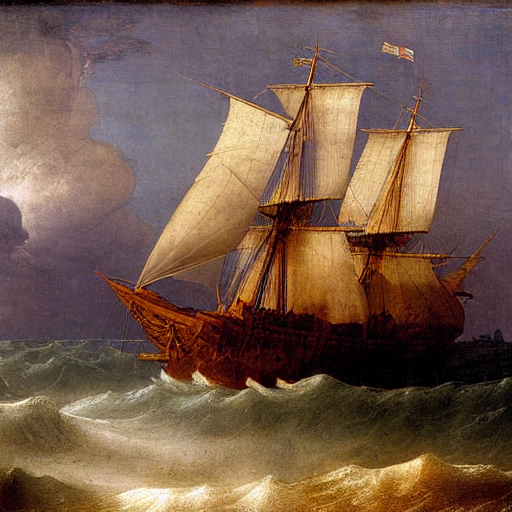

In [3]:
prompt = "Sailing ship in storm by Leonardo da Vinci"
negative_prompt = "ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, mutation, mutated, extra limbs, extra legs, extra arms, disfigured, deformed, cross-eye, body out of frame, blurry, bad art, bad anatomy, blurred, text, watermark, grainy"
width = 512
height = 512
guidance_scale = 7
steps = 50
seed = 1


generator = torch.Generator("cpu").manual_seed(seed)
image = pipe(
    prompt= prompt, 
    negative_prompt=negative_prompt, 
    width=width, height=height, 
    guidance_scale=guidance_scale, 
    num_inference_steps=steps,
    generator= generator
    ).images[0]

image.save("output.tmp/sailing_ship_v1_4_512x512.png")
image 